# 1. Introduction

[This dataset][data] contains information on 11,812,079 rides from *Cyclistic*, a bike-share company offering the following products:

- Annual subscriptions *(membership)*
- Single-ride or full-day passes *(casual rides)*

*Cyclistic*'s finance team asserts that annual memberships are more profitable than casual rides.

The marketing director, Lily Moreno, plans on maximizing annual subscriptions by targeting casual riders. She cites their familiarity with the products as a strong motive, and needs data-backed insights plus visualizations to examine whether this strategy is viable; so she can build a compelling case to the executives for its approval.

### Objectives

- Explore patterns in customer behaviour (casual rides vs memberships)
- Identify possible ways of converting casual riders into members.

[data]: https://www.kaggle.com/datasets/gunnarn/chicago-bicycle-rent-usage

In [ ]:
# ===============================Test sankey======================================
import pandas as pd
import matplotlib.pyplot as plt

from pysankey import sankey

df = pd.read_csv(
    'pysankey/tests/fruits.txt', sep=' ', names=['true', 'predicted']
)
colorDict = {
    'apple':'#f71b1b',
    'blueberry':'#1b7ef7',
    'banana':'#f3f71b',
    'lime':'#12e23f',
    'orange':'#f78c1b',
    'kiwi':'#9BD937'
}

ax = sankey(
    df['true'], df['predicted'], aspect=20, colorDict=colorDict,
    leftLabels=['banana','orange','blueberry','apple','lime'],
    rightLabels=['orange','banana','blueberry','apple','lime','kiwi'],
    fontsize=12
)

plt.show() # to display
# plt.savefig('fruit.png', bbox_inches='tight') # to save

# ===============================Test sankey======================================

In [1]:
# vs code写代码时候执行
import sys, os
sys.path.append("..")  # 跳到上级目录下面（sys.path添加目录时注意是在windows还是在Linux下，windows下需要‘\'否则会出错。）
colab_path = "."
if os.path.exists(colab_path):
    sys.path.append(colab_path)

In [2]:
# 如果你的Notebook运行时不能实时反应import的.py文件的代码变化
# 特别是当你同时在.py文件里写写改改然后在Notebook里尝试运行它的时候

# 在Notebook里添加自动重新加载
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import ticker
from matplotlib.axes import Axes
from pysankey import sankey

from rich import print

from cfg.cfg import *

# Customize matplotlib
plt.rc("figure", autolayout=True, figsize=(8, 5.5))
# plt.rc("font", family="serif")
# plt.rc("axes.spines", right=False, top=False)
# plt.rc("axes", titlesize=18, titlepad=30, titlelocation="left")
# plt.rc("lines", linewidth=2)
# plt.rc("xtick", labelsize=11)
# plt.rc("ytick", labelsize=11)

# sns.set_palette("Paired")

In [4]:
def customize_axes(
    ax: Axes, title: str, *, edit_legend: bool = True, annotate: bool = True
) -> Axes:
    """Update the title, axes-labels, tick-labels and legend, and optionally
    add annotations.

    Args:
        ax (Axes): The axes to modify.
        title (str): The desired title.
        edit_legend (bool): Whether or not to modify the legend.
        annotate (bool): Whether or not to annotate.

    Returns:
        matplotlib.axes.Axes: Customized axes.
    """
    ax.set_title(f"    {title}")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.yaxis.set_major_formatter("{x:,.0f}")

    if edit_legend:
        ax.legend().set_title("")

    if annotate:
        for bars in ax.containers:
            ax.bar_label(bars, padding=2,
                         labels=[f"{y:,.0f}" for y in bars.datavalues])
    return ax


dtypes = dict(
    rideable_type=pd.CategoricalDtype(
        ['classic_bike', 'docked_bike', 'electric_bike']),
    start_station_name="string",
    start_station_id="string",
    end_station_name="string",
    end_station_id="string",
    start_lat="float32",
    start_lng="float32",
    end_lat="float32",
    end_lng="float32",
    member_casual="category"
)

data = pd.concat(
    [
        pd.read_csv(
            file_path,
            usecols=range(1, 13),  # Ignore 1st col, ride_id
            dtype=dtypes,  # Use memory-friendly dtypes
            parse_dates=["started_at", "ended_at"]  # convert to datetime
        )
        for file_path in Path("./datasets").iterdir()
    ],
    ignore_index=True
)

print(
    "\t   Missing Values:",
    "\t   "+"="*14,
    (
        data.isna().sum().sort_values(ascending=False)
            .apply(lambda x: f"{x:,} ({x / len(data):.2%})")
    ),
    sep="\n",
    end="\n\n"
)
data.head()

Missing Values:
           ==============
end_station_id        1,329,512 (11.26%)
end_station_name      1,329,051 (11.25%)
start_station_id      1,230,740 (10.42%)
start_station_name    1,230,117 (10.41%)
end_lat                   12,495 (0.11%)
end_lng                   12,495 (0.11%)
rideable_type                  0 (0.00%)
started_at                     0 (0.00%)
ended_at                       0 (0.00%)
start_lat                      0 (0.00%)
start_lng                      0 (0.00%)
member_casual                  0 (0.00%)
dtype: object

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896400,-87.661003,41.932201,-87.658600,member
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924400,-87.715401,41.930599,-87.723801,member
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894501,-87.617897,41.867901,-87.623001,member
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903000,-87.697502,41.899200,-87.672203,member
4,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.890202,-87.626198,41.969501,-87.654701,casual


In [5]:
FIGURE_PATH

WindowsPath('e:/VS_project/Cyclistic-Bike-Share-Analysis/assets/figure')

In [6]:
data = data.dropna(axis=0, how='any')

In [7]:
data['start_station_name'].value_counts()[:20].index.tolist()

['Streeter Dr & Grand Ave',
 'Clark St & Elm St',
 'Michigan Ave & Oak St',
 'Wells St & Concord Ln',
 'Theater on the Lake',
 'Millennium Park',
 'Wells St & Elm St',
 'Clark St & Armitage Ave',
 'Kingsbury St & Kinzie St',
 'Clark St & Lincoln Ave',
 'Wabash Ave & Grand Ave',
 'Broadway & Barry Ave',
 'Dearborn St & Erie St',
 'Indiana Ave & Roosevelt Rd',
 'Wells St & Huron St',
 'St. Clair St & Erie St',
 'Larrabee St & Webster Ave',
 'Wilton Ave & Belmont Ave',
 'Wells St & Evergreen Ave',
 'Desplaines St & Kinzie St']

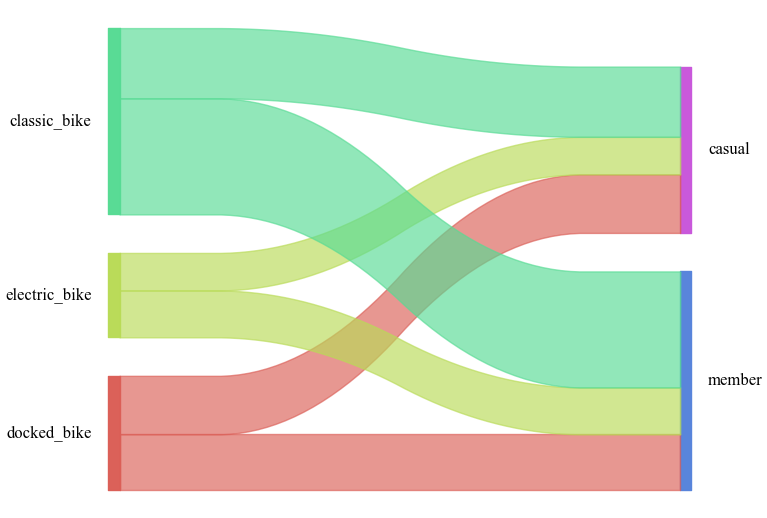

In [10]:
ax = sankey(
    data['rideable_type'], data['member_casual'], aspect=20,
    # leftLabels=data['start_station_name'].value_counts()[:10].index.tolist(),
    # rightLabels=data['start_station_name'].value_counts()[:10].index.tolist(),
    fontsize=12
)
plt.savefig(FIGURE_PATH / "sankey", bbox_inches='tight')
plt.show() # to display

# 2. Recommendations

## 2.1 Encourage casual users to ride more often

Members take more rides than casual users.

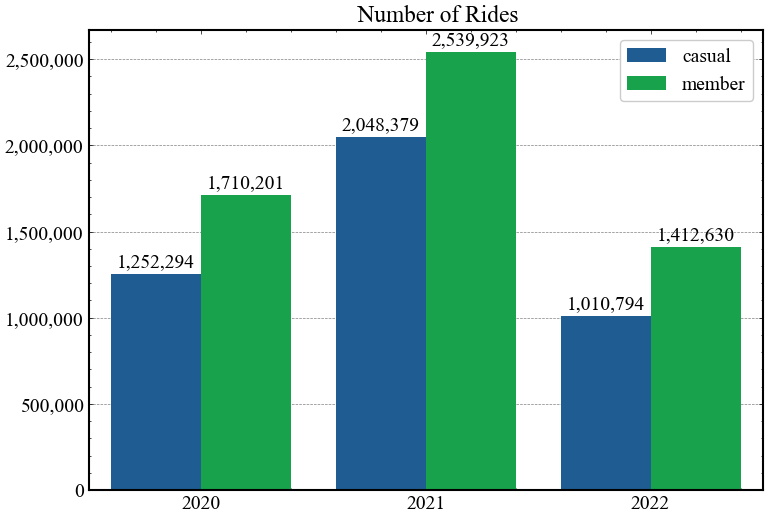

In [14]:
ax = sns.countplot(x=data["started_at"].dt.year, hue=data["member_casual"])
ax = customize_axes(ax, title="Number of Rides")
plt.savefig(FIGURE_PATH / "Number of Rides", bbox_inches='tight')

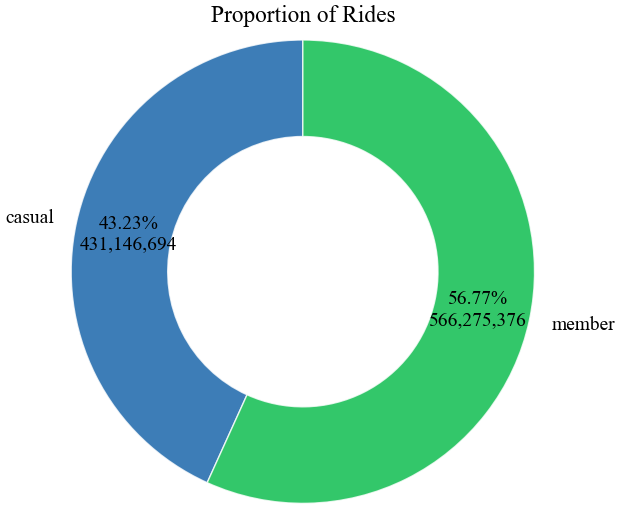

In [12]:
ax = data["member_casual"].value_counts().sort_values().plot.pie(
    autopct=lambda x: f"{x:.2f}%\n{x*len(data):,.0f}", pctdistance=0.77,
    startangle=90, radius=1.2,
    wedgeprops=dict(width=0.5, edgecolor='w', alpha=0.8),
)
ax.axis("off")
_ = ax.set_title("Proportion of Rides", loc="center")
plt.savefig(FIGURE_PATH / "Proportion of Rides", bbox_inches='tight')

Designing routine campaigns that encourage even more casual riders to **ride frequently** might emphasize the value of our services and convince them to sign up.


## 2.2 Boost Campaign efforts in Summer

The bike-share business is **seasonal**, with the number of rides rising from start-of-year, peaking between July & October, and then dipping towards end-of-year.

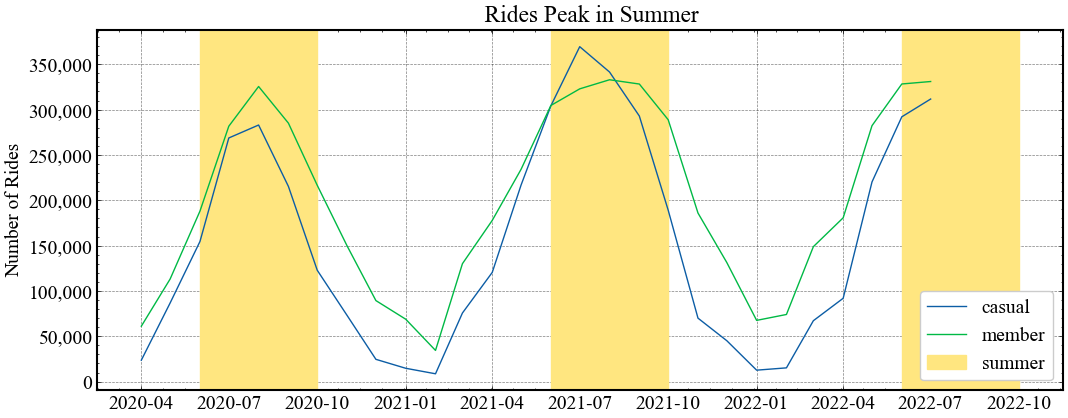

In [15]:
monthly_rides_count = (
    data[["member_casual", "started_at"]]
    .groupby("member_casual")
    .resample("1MS", on="started_at")
    .count().get("member_casual").rename("num_rides").reset_index()
)
plt.figure(figsize=(11, 4.5))
ax = sns.lineplot(data=monthly_rides_count, x="started_at", y="num_rides",
             hue="member_casual")
for offset, year in enumerate([2020, 2021, 2022]):
    # Offset is to show summer in legend just once. See
    # https://stackoverflow.com/a/44633022/13577373
    ax.axvspan(f"{year}-06", f"{year}-10", color="#ffe680",
               label="_"*offset+"summer")  # ax.axvspan可以再坐标轴添加垂直区域(矩形)  https://blog.csdn.net/chongbaikaishi/article/details/108816551

customize_axes(ax, title="Rides Peak in Summer", annotate=False)
_ = ax.set_ylabel("Number of Rides")
plt.savefig(FIGURE_PATH / "Rides Peak in Summer", bbox_inches='tight')

People are naturally more inclined to engage in outdoor activities like cycling in summer, and this could result in a **higher success rate** for targeted campaigns.

Designing custom summer packages that give casual riders a **taste of the benefits** of membership might entice them to subscribe. 


## 2.3 Promote classic & electric bikes

Members seem to prefer classic and electric bikes.

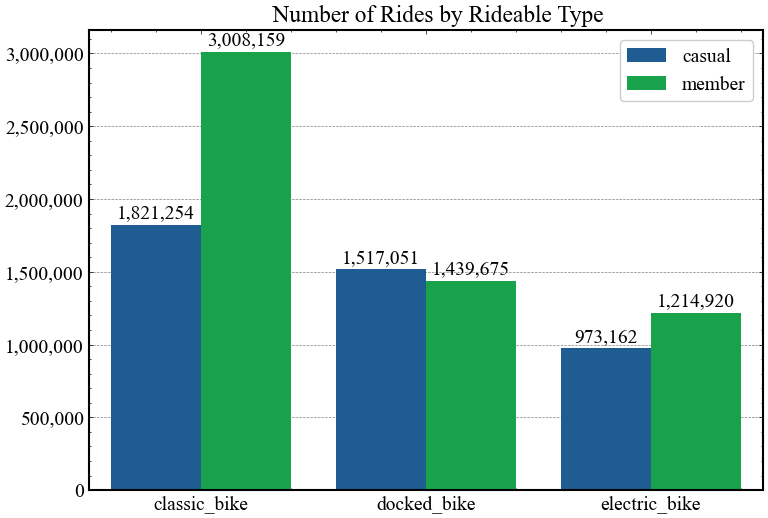

In [16]:
ax = sns.countplot(x=data["rideable_type"], hue=data["member_casual"])
_ = customize_axes(ax, title="Number of Rides by Rideable Type")
plt.savefig(FIGURE_PATH / "Number of Rides by Rideable Type", bbox_inches='tight')

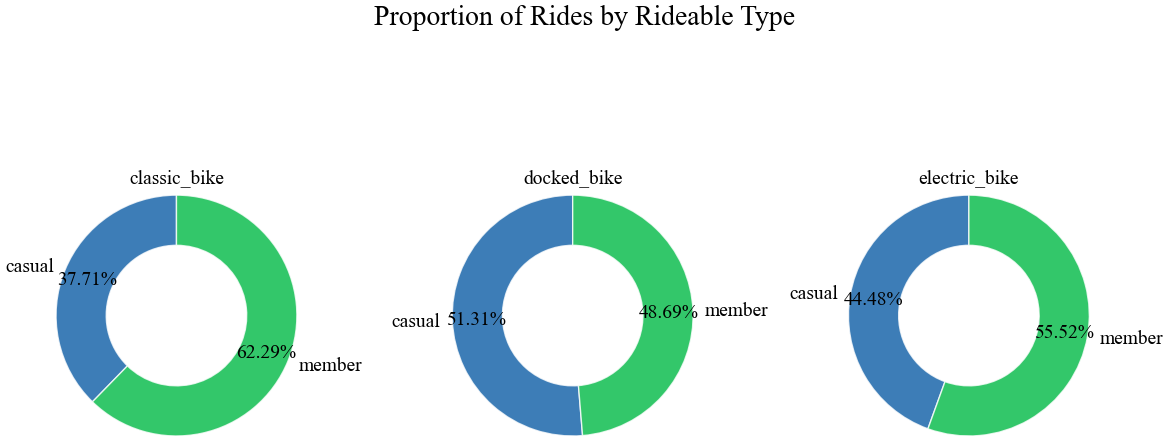

In [17]:
axes = pd.crosstab(data["member_casual"], data["rideable_type"]).plot.pie(
    subplots=True, figsize=(12, 6), startangle=90, radius=1.2,
    autopct="%2.2f%%", pctdistance=0.8,
    wedgeprops=dict(width=0.5, alpha=0.8, edgecolor="white"),
    legend=False
)
for ax in axes:
    ax.axis("off")
    ax.set_title(ax.get_ylabel(), size=14, loc="center")
_ = ax.figure.suptitle("Proportion of Rides by Rideable Type", size=20)
plt.savefig(FIGURE_PATH / "Proportion of Rides by Rideable Type", bbox_inches='tight')

Exposing casual riders to more classic and electric bikes might **improve their experience**, and motivate them to sign up.


## 2.4 Go where they flock

Majority of the casual riders start and end their trips at the 'Streeter Dr & Grand Ave', 'Millennium Park', 'Michigan Ave & Oak St' and 'Theater on the Lake' stations. These are probably the best places to **reach them in-person**.

In [25]:
plt.rcParams['font.size'] = 11

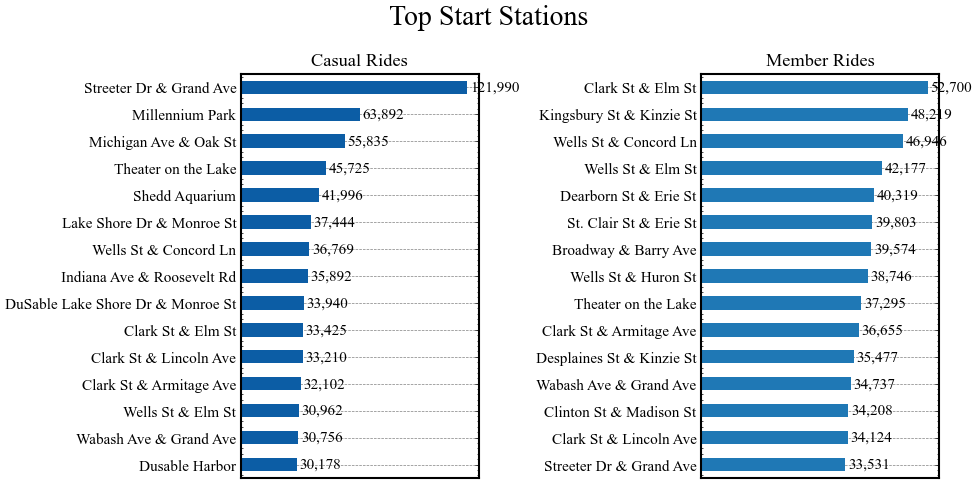

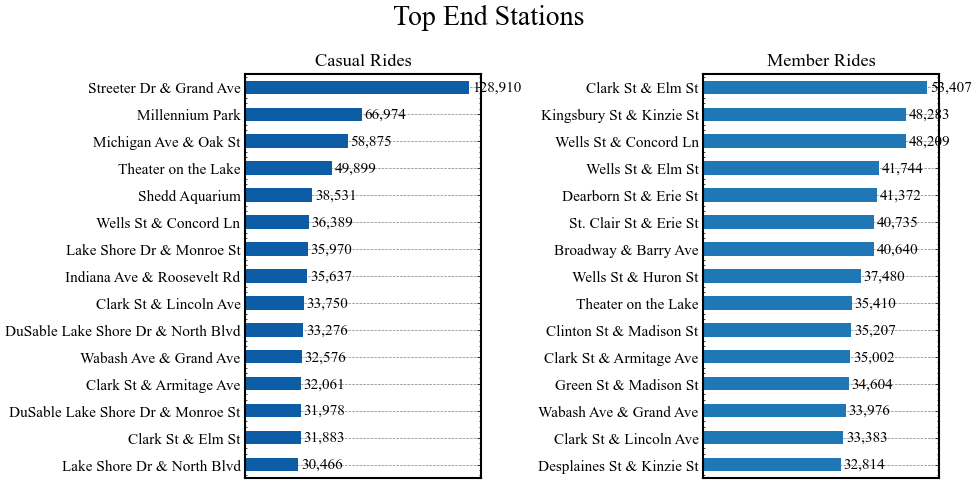

In [26]:
for point in ["start", "end"]:
    station_data = data.groupby("member_casual")[f"{point}_station_name"].value_counts()

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    fig.suptitle(f"Top {point} Stations".title(), size=20)

    station_data.loc["casual"].nlargest(15).sort_values()\
        .plot.barh(ax=ax1, title="Casual Rides")
    station_data.loc["member"].nlargest(15).sort_values()\
        .plot.barh(ax=ax2, title="Member Rides", color="#1f78b5")

    for ax in [ax1, ax2]:
        ax.xaxis.set_visible(False)
        ax.set_ylabel("")
        for bars in ax.containers:
            ax.bar_label(bars, [f"{x:,}" for x in bars.datavalues], padding=2)
    plt.savefig(FIGURE_PATH / f"Top {point} Stations".title(), bbox_inches='tight')

### 2.4.1 Map of 25 most popular start & end stations for members

In [14]:
coords = {
    "start": data[["start_lat", "start_lng"]].groupby(data["start_station_name"]).first(),
    "end": data[["end_lat", "end_lng"]].groupby(data["end_station_name"]).first()
}
member_stations = data.query("member_casual == 'member'")
m = folium.Map(location=member_stations[["start_lat", "start_lng"]].median(), zoom_start=13,
               min_zoom=12, max_zoom=17, width=500, height=400)
for side, color in zip(["start", "end"], ["lime", "red"]):
    mean_count = (member_stations["start_station_name"].value_counts().mean()
                  + member_stations["end_station_name"].value_counts().mean()) / 2
    for name, count in member_stations[f"{side}_station_name"].value_counts().nlargest(25).items():
        folium.Circle(
            radius=int(count / mean_count) * 5,
            location=list(coords[side].loc[name]),
            popup=f"{name} <pre>ride {side}s = {count:,}</pre>",
            color=color,
            fill=False,
        ).add_to(m)
m

### 2.4.2 Map of 25 most popular start & end stations for casual riders

In [15]:
casual_stations = data.query("member_casual == 'casual'")
m = folium.Map(location=casual_stations[["start_lat", "start_lng"]].median(), zoom_start=13,
               min_zoom=12, max_zoom=17, width=500, height=400)
for side, color in zip(["start", "end"], ["lime", "red"]):
    mean_counts = (casual_stations["start_station_name"].value_counts().mean()
                   + casual_stations["end_station_name"].value_counts().mean()) / 2
    for name, count in casual_stations[f"{side}_station_name"].value_counts().nlargest(25).items():
        folium.Circle(
            radius=int(count / mean_counts) * 5,
            location=list(coords[side].loc[name]),
            popup=f"{name} <pre>ride {side}s = {count:,}</pre>",
            color=color,
            fill=False,
        ).add_to(m)
m

## 2.5 Update geo-tracking gear and improve data quality

There are numerous records in the data where the ride end-time is earlier than the start-time e.g

In [16]:
data.loc[[3847334, 3821924]]  # Rides start 15th Dec 2020, end 25th Nov 2020?

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3847334,electric_bike,2021-05-19 12:22:21,2021-05-19 12:35:59,Clinton St & 18th St,TA1307000044,Clinton St & Madison St,TA1305000032,41.857933,-87.640816,41.881611,-87.641212,member
3821924,docked_bike,2021-04-18 13:57:18,2021-04-18 14:05:49,Kedzie Ave & Palmer Ct,13292,Campbell Ave & Fullerton Ave,15648,41.921524,-87.707321,41.924633,-87.689308,casual


Such anomalies cast doubts on the integrity of the data, and result in a lot of outliers:

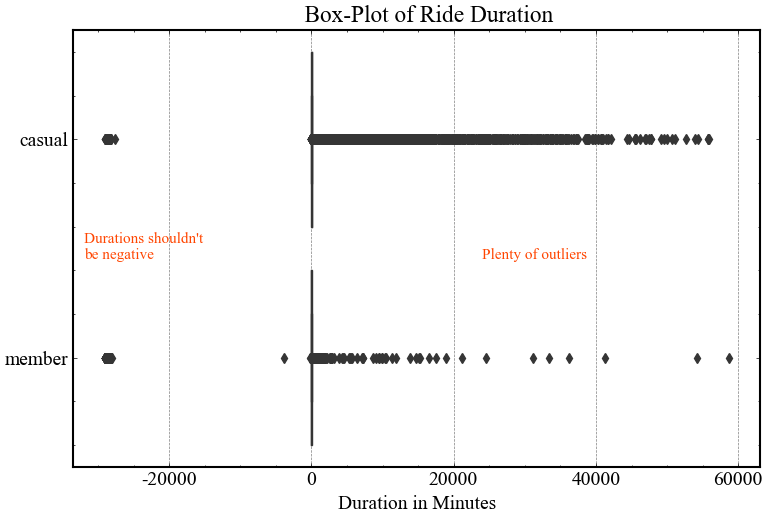

In [19]:
ride_durations_mins = (data["ended_at"] - data["started_at"]).dt.total_seconds() / 60
ax = sns.boxplot(x=ride_durations_mins, y=data["member_casual"])
ax.set_xlabel("Duration in Minutes")
ax.set_ylabel("")
ax.set_title("    Box-Plot of Ride Duration")
ax.text(24000, 0.55, "Plenty of outliers", color="orangered", size=11)
_ = ax.text(-32000, 0.55, "Durations shouldn't\nbe negative",
            color="orangered", size=11)
plt.savefig(FIGURE_PATH / "Box-Plot of Ride Duration", bbox_inches='tight')

Moving on, it appears that **casual users take longer** with the bikes. This might be because they ride for leisure, taking their time. The longest rides occur on Sundays. 

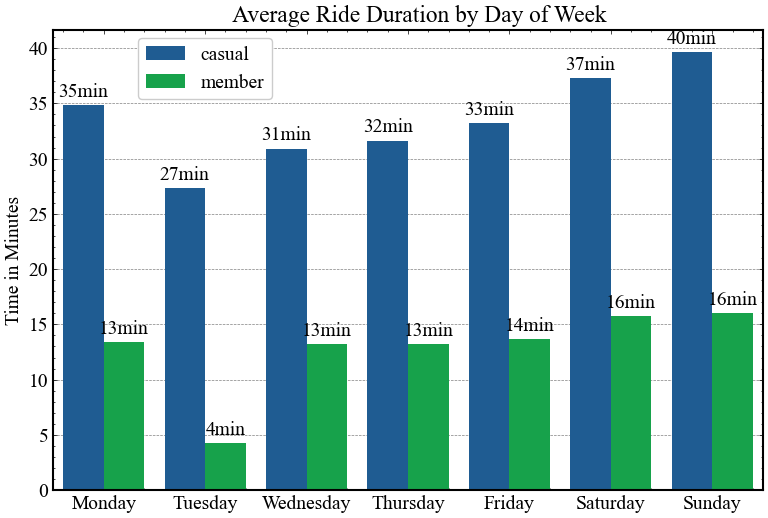

In [20]:
daily_avg_duration = ride_durations_mins.groupby(
    [data["member_casual"], data["started_at"].dt.day_name()]
).mean().rename("duration_in_mins").reset_index()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

ax = sns.barplot(data=daily_avg_duration, x="started_at", y="duration_in_mins",
           hue="member_casual", order=day_order)
customize_axes(ax, title="Average Ride Duration by Day of Week", annotate=False)

ax.legend(loc=(0.12, 0.85))
ax.set_ylabel("Time in Minutes")
for bars in ax.containers:
    ax.bar_label(bars, [f"{x:.0f}min" for x in bars.datavalues], padding=3)
plt.savefig(FIGURE_PATH / "Average Ride Duration by Day of Week", bbox_inches='tight')

Perhaps special weekend packages & incentives for midweek rides might persuade casual users to subscribe.